<div style='font-size:20pt'>- 3장 정적크롤링 복습<div>

In [2]:
from bs4 import BeautifulSoup as bs
import requests
import re
import json

In [24]:
webPage = open("data/Sample01.html", "rt", encoding="utf-8").read()
# rt는 text형식으로 read하겠다는 의미

# print(webPage)
# 그냥 String형임

#BeatifulSoup형으로 바꿔주려면(파싱하려면)
soup = bs(webPage, "html.parser")

# 파싱 후 출력방법1
print(type(soup))

# 파싱 후 출력방법2
print(soup.prettify())


<class 'bs4.BeautifulSoup'>
<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <title>
   Test BeautifulSoup
  </title>
 </head>
 <body>
  <p align="center">
   P태그의 컨텐트
  </p>
  <img src="http://unico2013.dothome.co.kr/image/flower.jpg" width="300"/>
  <img src="https://search.daum.net/nate?thr=sbma&amp;w=tot&amp;q=%EC%95%88%EC%9C%A0%EC%A7%84" width="300"/>
  <ul>
   <li>
    테스트1
    <strong>
     강조
    </strong>
   </li>
   <li>
    테스트2
   </li>
   <li>
    테스트3
   </li>
  </ul>
  <div>
   <ul>
    <li>
     한빛출판네트워크
    </li>
    <li>
     비기너
    </li>
    <li>
     데이터 분석
    </li>
   </ul>
  </div>
 </body>
</html>



In [25]:
# p태그 추출
p1 = soup.p
    # 방법1 : 첫번째 p태그 전체를 리턴
print(p1)
    # 방법2 : String형태로 리턴
print(p1.string)
print(p1.text)
print(p1.getText())
print(p1.get_text())
    # 방법3 : 리스트 형식으로 리턴 함
print(p1.contents)

<p align="center">P태그의 컨텐트</p>
P태그의 컨텐트
P태그의 컨텐트
P태그의 컨텐트
P태그의 컨텐트
['P태그의 컨텐트']


In [26]:
# li태그 추출
li1 = soup.li 
    # 방법1 : 첫번째 li태그 전체를 리턴
print(li1)
    # 방법2 : .string은 텍스트 이외의 것(태그)이 있으면 None이 됨
print(li1.string)
    # 방법2 : test는 텍스트 부분만 뽑아서 리턴함.
print(li1.text)
print(li1.getText())
print(li1.get_text())
    # 방법3 : 태그를 기준으로 구분하여  리스트로 리턴함
print(li1.contents)

<li>테스트1<strong>강조</strong></li>
None
테스트1강조
테스트1강조
테스트1강조
['테스트1', <strong>강조</strong>]


In [34]:
# find_all 활용

    # 가장 처음 만나는 li태그를 찾아줌
li2 = soup.find("li")
print(li2)
    # 모든 li태그를 찾아서 리스트형태로 리턴함
li_list = soup.find_all("li")
print(li_list)
print("-----------------------------------------")
    # 원하는 번째의 태그를 찾기위해서는
ul = soup.find("ul")
print(ul)
li_list2 = ul.find_all("li")
print(li_list2)
print("-----------------------------------------")
div=soup.find("div")
print(div)
li_list3 = div.find_all("li")
print(li_list3)
print("-----------------------------------------")
soup.div.find_all("li")
soup.div.li

<li>테스트1<strong>강조</strong></li>
[<li>테스트1<strong>강조</strong></li>, <li>테스트2</li>, <li>테스트3</li>, <li> 한빛출판네트워크 </li>, <li> 비기너 </li>, <li> 데이터 분석 </li>]
-----------------------------------------
<ul>
<li>테스트1<strong>강조</strong></li>
<li>테스트2</li>
<li>테스트3</li>
</ul>
[<li>테스트1<strong>강조</strong></li>, <li>테스트2</li>, <li>테스트3</li>]
-----------------------------------------
<div>
<ul>
<li> 한빛출판네트워크 </li>
<li> 비기너 </li>
<li> 데이터 분석 </li>
</ul>
</div>
[<li> 한빛출판네트워크 </li>, <li> 비기너 </li>, <li> 데이터 분석 </li>]
-----------------------------------------


<li> 한빛출판네트워크 </li>

In [ ]:
# select 활용하면 더 쉽게 원하는 태그를 추출가능
    # >는 자식을 의미 하므로, div의 자식태그 중  ul태그인것을 가져오고, 자식태그 li태그들을 모두 가져옴
li_list4 = soup.select("div > ul > li")
print(li_list4)

    # 띄어쓰기는 하위에 있는 모든 태그를 가져옴
li_list4 = soup.select("div li")
print(li_list4)
    # 첫번째 하나만 가져오고 싶으면 .select_one() 활용
li_list4 = soup.select_one("div li")
print(li_list4)

[<li> 한빛출판네트워크 </li>, <li> 비기너 </li>, <li> 데이터 분석 </li>]
[<li> 한빛출판네트워크 </li>, <li> 비기너 </li>, <li> 데이터 분석 </li>]
<li> 한빛출판네트워크 </li>


In [1]:
# 알라딘 사이트에서 크롤링해기
    # 알라딘 사이트 -> 개발자모드 -> 원하는 태그에 우클릭 -> 복사(select복사)
    # 복사한 내용 : Myform > div:nth-child(3) > table > tbody > tr > td:nth-child(3) > table > tbody > tr:nth-child(1) > td:nth-child(1) > div:nth-child(1)

from bs4 import BeautifulSoup as bs
import requests

# 정규표현식으로 만들때 사용
import re

import json

In [ ]:
#url = "https://www.aladin.co.kr/shop/common/wbest.aspx?BranchType=1"

base = "https://www.aladin.co.kr/shop/common/wbest.aspx?BestType=Bestseller&BranchType=1&CID=0&page="
books =[]

for i in range(4):
    url = base + str(i+1)

    res = requests.get(url)
    soup = bs(res.text, 'html.parser')
    # print(soup)
        # find_all 이용
    book_list = soup.findAll('div',{'class':'ss_book_list'})
    # book_list = soup.findAll('div',{'class_':'ss_book_list'})
        # enumerate : 리스트의 인덱스를 가지게 해줌
    for index, book in enumerate(book_list):
        if index% 2 ==0:
            print(f'index: {index*(i+1)}')
            book_ul = book.find('ul')
            title = book_ul.find('a', {'class':'bo3'}).text
            print(f'title:{title}')

                # 가격에는 class명이 없으므로   
            book_price = ""
            book_author = ""
            book_li_list = book_ul.findAll('li')
            price = book_li_list[3].find('span').text.replace(',','')
            print(f'price:{price}')
                # 할인가
            discount_price = book_ul.find('span', {'class':'ss_p2'}).text.replace('원','')
            discount_price = discount_price.replace(',','')
            print(f'discount price:{discount_price}') 
                # 작가명
            author = book_li_list[2].find('a')
            if author != None:
                author = author.text
            else:
                author = book_li_list[1].find('a').text
            print(f'author:{author}')
            books.append((title, price, discount_price, author))

# 같은 ip로 여러번 실행하다보면 알라딘 서버에서 트래픽차단을 걸 수도 있음(때문에 처음에 for i=10까지 일때는 됐는데 나중에 하면 트래픽이 걸려서 안될수도 있음)

index: 0
title:소년이 온다
price:15000
discount price:13500
author:한강
index: 2
title:스토너
price:16800
discount price:15120
author:존 윌리엄스
index: 4
title:그릿 Grit
price:18800
discount price:16920
author:김주환
index: 6
title:봄밤의 모든 것
price:17000
discount price:15300
author:백수린
index: 8
title:양심
price:18000
discount price:16200
author:최재천
index: 10
title:초역 부처의 말
price:17800
discount price:16020
author:코이케 류노스케
index: 12
title:듀얼 브레인
price:21000
discount price:18900
author:이선 몰릭
index: 14
title:모순
price:13000
discount price:11700
author:양귀자
index: 16
title:2025 큰별쌤 최태성의 별★별한국사 한국사능력검정시험 심화(1, 2, 3급) 상
price:16500
discount price:14850
author:최태성
index: 18
title:ETS 토익 정기시험 기출문제집 1000 Vol. 4 Reading (리딩)
price:19800
discount price:17820
author:ETS
index: 20
title:황현필의 진보를 위한 역사
price:22000
discount price:19800
author:황현필
index: 22
title:ETS 토익 정기시험 기출문제집 1000 Vol. 4 Listening (리스닝)
price:19800
discount price:17820
author:ETS
index: 24
title:해커스 토익 기출 VOCA (보카)
price:12900
discount price:11610
author:

In [72]:
# 잘 담겼는지 확인
print(len(books))
books


500


[('소년이 온다', '15000', '13500', '한강'),
 ('스토너', '16800', '15120', '존 윌리엄스'),
 ('그릿 Grit', '18800', '16920', '김주환'),
 ('봄밤의 모든 것', '17000', '15300', '백수린'),
 ('양심', '18000', '16200', '최재천'),
 ('초역 부처의 말', '17800', '16020', '코이케 류노스케'),
 ('듀얼 브레인', '21000', '18900', '이선 몰릭'),
 ('모순', '13000', '11700', '양귀자'),
 ('2025 큰별쌤 최태성의 별★별한국사 한국사능력검정시험 심화(1, 2, 3급) 상', '16500', '14850', '최태성'),
 ('ETS 토익 정기시험 기출문제집 1000 Vol. 4 Reading (리딩)', '19800', '17820', 'ETS'),
 ('황현필의 진보를 위한 역사', '22000', '19800', '황현필'),
 ('ETS 토익 정기시험 기출문제집 1000 Vol. 4 Listening (리스닝)', '19800', '17820', 'ETS'),
 ('해커스 토익 기출 VOCA (보카)', '12900', '11610', 'David Cho'),
 ('삶이라는 완벽한 농담', '17800', '16020', '이경규'),
 ('2025 큰별쌤 최태성의 별★별한국사 한국사능력검정시험 심화(1, 2, 3급) 하', '16000', '14400', '최태성'),
 ('채식주의자 (리마스터판)', '15000', '13500', '한강'),
 ('어른의 행복은 조용하다', '17800', '16020', '태수'),
 ('작별하지 않는다', '16800', '15120', '한강'),
 ('자살의 연구', '18000', '16200', '앨 앨버레즈'),
 ('마음의 기술', '21000', '18900', '안-엘렌 클레르'),
 ('침묵의 퍼레이드', '21800', '19620', 

In [73]:
# 데이터 프레임으로 파일 저장하기
import pandas as pd
df = pd.DataFrame(books, columns=['title', 'price', 'discount_price', 'author'])
df.to_csv('data/aladinBooks.csv', index=False)
df

,title,price,discount_price,author
0,소년이 온다,15000,13500,한강
1,스토너,16800,15120,존 윌리엄스
2,그릿 Grit,18800,16920,김주환
3,봄밤의 모든 것,17000,15300,백수린
4,양심,18000,16200,최재천
...,...,...,...,...
495,융합적 사고와 창의적 글쓰기,20000,19000,경기대학교 사고와 표현 교재편찬위원회
496,진도별 변시·사시 기출 두문자 민법사례연습,55000,52250,곽낙규
497,돈미새,5510,16920,정윤진(돈버는형님들)
498,초판본 싯다르타,6430,2690,헤르만 헤세


In [74]:
import pymysql
conn = pymysql.connect(
    host='localhost',
    user='root',
    password='1234',
    db='pydb',
    charset='utf8'    #utf-8이라고 쓰면 안됨
    )
print(conn)
cursor=conn.cursor()
sql="insert into tblbook(title, price, discount_price, author) values(%s,%s,%s,%s)"
cursor.executemany(sql, books)
conn.commit()
conn.close()

-- 이미지 크롤링(yes24 사이트 활용)

In [47]:
import requests
from bs4 import BeautifulSoup as bs
import re
import urllib.request as req

# 이미지 가져오기(yes24 사이트 활용)

base = "https://www.yes24.com/Product/Search?query=%25ED%258C%258C%25EC%259D%25B4%25EC%258D%25AC&page="

In [48]:
# 이미지 가져와 파일로 저장하는 함수(두블럭 아래 코드 먼저 보고오셈)

def save_img(src, title):
    # +는 한자이상 있어야함
    # *는 뭔지 다시 검색해봐바 이해 못함
    pattern = r'[가-힣a-zA-Z0-9]+'
    result = re.findall(pattern, title)
    # result가 띄어쓰기 기준으로 리스트로 저장됨
    result = ' '.join(result)
    #join으로 리스트를 묶어줌

    path = f'data/images/{result}.jpg'
    
    req.urlretrieve(src,path)
    print(path, '저장됨')


In [ ]:
# 크롤링 
books=[]
for i in range(1,3):
    url=base+str(i)
    res=requests.get(url)
    soup=bs(res.text, 'html.parser')

    item_list = soup.select("#yesSchList > li")

    for item in item_list:

    # 제목    
        # yesSchList > li:nth-child(1) > div > div.item_info > div.info_row.info_name > a.gd_name
        # select 사용
        title = item.select_one('a.gd_name').text
        # find 사용
        # title = item.find('a', {'class':'gd_name'}).text
    
    # 저자    
        # yesSchList > li:nth-child(1) > div > div.item_info > div.info_row.info_pubGrp > span.authPub.info_auth
        author = item.select_one('span.authPub.info_auth > a').text

    # 가격
        # #yesSchList > li:nth-child(1) > div > div.item_info > div.info_row.info_price > strong > em
        price = item.select_one('div.info_row.info_price > strong > em').text.replace(',','')

    # 평점
        # 평점은 없는것들도 있기 때문에 NONE값 처리해줘야함
        # #yesSchList > li:nth-child(1) > div > div.item_info > div.info_row.info_rating > span.rating_grade > em
        grade = item.select_one('span.rating_grade > em')
        if grade:
            grade = grade.text
        else:
            grade = '0.0'
        
    # 이미지 출력
        # yesSchList > li:nth-child(2) > div > div.item_img > div.img_canvas > span > span > a > em > img.lazy     
        img= item.select_one('img.lazy')
        src = img['data-original']
        save_img(src, title)
    
    # 자료 DB에 추가   
        data = (title, author, int(price), float(grade))
        # print(data)
        books.append(data)

# print(books)


data/images/Do it 점프 투 파이썬.jpg 저장됨
data/images/두근두근 파이썬.jpg 저장됨
data/images/파이썬 for Beginner.jpg 저장됨
data/images/혼자 공부하는 파이썬.jpg 저장됨
data/images/난생처음 파이썬 프로그래밍.jpg 저장됨
data/images/밑바닥부터 시작하는 딥러닝 1.jpg 저장됨
data/images/으뜸 파이썬.jpg 저장됨
data/images/파워 유저를 위한 파이썬 EXPRESS.jpg 저장됨
data/images/혼자 공부하는 머신러닝 딥러닝.jpg 저장됨
data/images/난생처음 컴퓨팅 사고 with 파이썬.jpg 저장됨
data/images/따라하며 배우는 파이썬과 데이터 과학.jpg 저장됨
data/images/혼자 만들면서 공부하는 파이썬.jpg 저장됨
data/images/파이썬으로 쉽게 배우는 자료구조.jpg 저장됨
data/images/데이터 과학을 위한 기초수학 with 파이썬.jpg 저장됨
data/images/컴퓨팅 기반 문제해결 with 파이썬.jpg 저장됨
data/images/새내기 파이썬.jpg 저장됨
data/images/수학자와 함께하는 인공지능 수학 with 파이썬.jpg 저장됨
data/images/최신 파이썬 완전정복 기초에서 심화까지.jpg 저장됨
data/images/코딩 자율학습 나도코딩의 파이썬 입문.jpg 저장됨
data/images/파이썬 업무 자동화 일잘러 되기 챗GPT.jpg 저장됨
data/images/어서와 파이썬은 처음이지.jpg 저장됨
data/images/진짜 업무에 쓰는 챗GPT 노코드 데이터 분석.jpg 저장됨
data/images/대표 전략으로 입문하는 미국 주식 퀀트 투자.jpg 저장됨
data/images/파이썬으로 웹 크롤러 만들기.jpg 저장됨
data/images/야구 데이터로 배우는 파이썬.jpg 저장됨
data/images/2025 시대에듀 빅데이터분석기사 실기 파이썬 한권으로 끝내기.j

In [ ]:
# 이미지 가져오기 연습(이해하기)
import urllib.request as req
src = 'https://image.yes24.com/goods/119293186/L'
path="data/images/img.jpg"
req.urlretrieve(src, path)

('data/images/img.jpg', <http.client.HTTPMessage at 0x1b649d76780>)

# 4장 동적 크롤링

<div style='font-size:20pt'>- 동적 웹크롤링 개요</div>

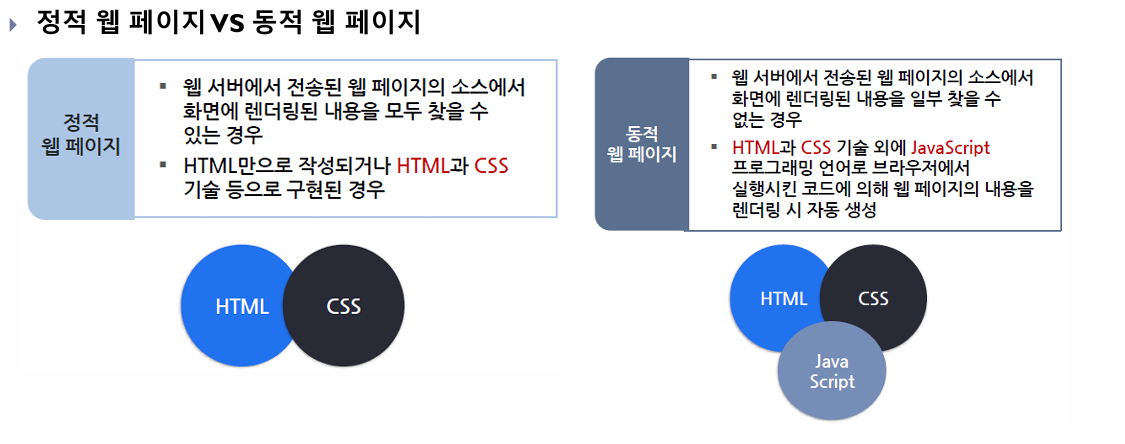

<div style= font-size:20pt> - Selenunum </div>

웹/앱을 테스트 할 때 이용하는 프레임워크

In [5]:
# seleninum 개발환경 구축
    # 설치
! pip install selenium
    # 콘다 병령을 통해서도 가능
# ! conda install selenium 

In [9]:
# selenium은 웹 드라이버가 필요함
from selenium import webdriver
# 웹드라이버로  크롬 창이 열리도록 만들어줌(브라우저 객체를 생설하고 열기함)
driver = webdriver.Chrome()
# 열려있는 브라우저에 웹페이지를 불러옴(네이버)
driver.get("http://www.naver.com")

In [10]:
# 브라우저 닫기
driver.quit()

In [ ]:
# 로딩 기다리기
import time
driver = webdriver.Chrome()
driver.get("http://www.naver.com")
driver.implicitly_wait(10) # 위의 코드 로딩을 최대 10초 기다림
time.sleep(5)           # 로딩 후 무조건 5초 기다림
# 자동실행을 만들 떄 버튼이 로딩이 되기도 전에 버튼 클릭을 실행하지 않도록 하기 위해 사용됨.
driver.quit()

In [21]:
# 특정 요소 클릭하기
driver = webdriver.Chrome()
driver.get("http://www.google.com")
time.sleep(5)

# 링크걸린(즉 a태그) 텍스트 중에서 Gmail을 의미함
button = driver.find_element('link text', 'Gmail')
# 클릭하는 명령어
button.click()
driver.implicitly_wait(3)
driver.quit()


In [83]:
# 키보드 입력을 위한 import
from selenium.webdriver.common.keys import Keys

driver = webdriver.Chrome()
driver.get("http://www.google.com")
driver.implicitly_wait(10)

# name이라는 속성의 값이 q인 것을 찾아라!
search_box = driver.find_element("name", "q")
# 파이썬이라고 입력해!
search_box.send_keys("파이썬")
# ENTER 키 눌러!
search_box.send_keys(Keys.ENTER)

time.sleep(10)
driver.quit()


KeyboardInterrupt: 

In [ ]:
# 네이버로 연습해보자
from selenium.webdriver.common.keys import Keys
driver = webdriver.Chrome()
driver.get("http://www.naver.com")
driver.implicitly_wait(3)
driver.find_element("id", "query").send_keys("안유진", Keys.ENTER)
time.sleep(10)
driver.quit()


In [32]:
# Selenium API 메서드를 활용한 웹페이지 파싱 연습1
    #ppt에 있는 연습 문제로 연습해보자
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

# 하위 태그의 경로를 활용해서 바로접근하려면
from selenium.webdriver.common.by import By

driver = webdriver.Chrome()
print("WebDriver 객체 : ", type(driver))

driver.get("http://www.google.com/ncr")   # 검색창

#접근할때 방법이 많지만, CSS_SELECTOR로 접급해보자면 뒤에 [속성명='속성값']
target = driver.find_element(By.CSS_SELECTOR, "[name='q']")
# By.ID : 특정 ID속성값을 갖는 태그를 찾으려면
# By.NAME : 특정 NAME속성값을 갖는 태그를 찾으려면
# By.CLASS_NAME : 특정 class값을 가지는 태그 값을 찾으려면
# By.TAG_NAME : 특정 속성을 가지는 태그들을 찾으려면 
# By.LINK_TEXT : 특정 이름(텍스트)을 가지는 링크태그(a태그)를 찾으려면
# By.PARTIAL_LINK_TEXT : 특정 이름(텍스트)을 포함한 링크태그(a태그)를 찾으려면

print("찾아온 태그 객체 : ", type(target))
target.send_keys('파이썬', Keys.ENTER)
#driver.quit()


WebDriver 객체 :  <class 'selenium.webdriver.chrome.webdriver.WebDriver'>
찾아온 태그 객체 :  <class 'selenium.webdriver.remote.webelement.WebElement'>


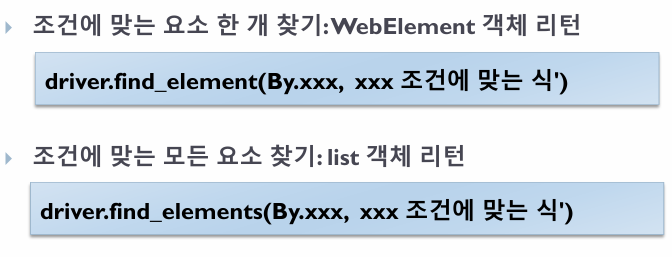   

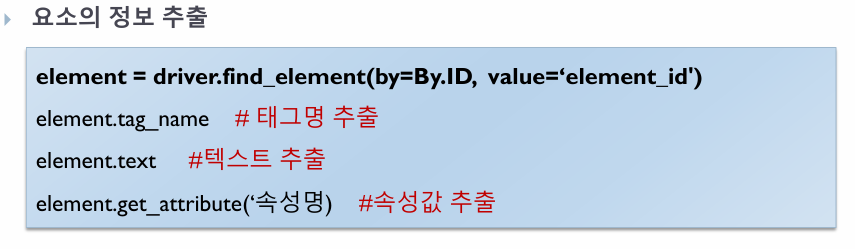

In [43]:
# Selenium API 메서드를 활용한 웹페이지 파싱 연습2
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

driver = webdriver.Chrome()
print("WebDriver 객체 : ", type(driver))
driver.get("http://www.naver.com/")

# 대소문자 주의!
# target = driver.find_element(By.CSS_SELECTOR, "[name='query']")
# target = driver.find_element(By.NAME, "query")
# target = driver.find_element(By.ID, "query")
# target = driver.find_element(By.CLASS_NAME, "search_input")

# 모든 input태그를 찾아서 리스트로 저장
target = driver.find_elements(By.TAG_NAME, "input")
print(target)
# 14번째 input태그가 입력창이였기에 14번째 친구를 target으로 다시 저장
target = target[13]

print("찾아온 태그 객체 : ", type(target))
target.send_keys('파이썬', Keys.ENTER)
#driver.quit()


WebDriver 객체 :  <class 'selenium.webdriver.chrome.webdriver.WebDriver'>
[<selenium.webdriver.remote.webelement.WebElement (session="b3387a97d05606dfb97b147bdd793d2f", element="f.943DDC9F1362ACEC7EDE1657794A54D5.d.C5F3025A7AB62EC42F763FBCF5DC98BF.e.69")>, <selenium.webdriver.remote.webelement.WebElement (session="b3387a97d05606dfb97b147bdd793d2f", element="f.943DDC9F1362ACEC7EDE1657794A54D5.d.C5F3025A7AB62EC42F763FBCF5DC98BF.e.70")>, <selenium.webdriver.remote.webelement.WebElement (session="b3387a97d05606dfb97b147bdd793d2f", element="f.943DDC9F1362ACEC7EDE1657794A54D5.d.C5F3025A7AB62EC42F763FBCF5DC98BF.e.71")>, <selenium.webdriver.remote.webelement.WebElement (session="b3387a97d05606dfb97b147bdd793d2f", element="f.943DDC9F1362ACEC7EDE1657794A54D5.d.C5F3025A7AB62EC42F763FBCF5DC98BF.e.72")>, <selenium.webdriver.remote.webelement.WebElement (session="b3387a97d05606dfb97b147bdd793d2f", element="f.943DDC9F1362ACEC7EDE1657794A54D5.d.C5F3025A7AB62EC42F763FBCF5DC98BF.e.73")>, <selenium.webdriv

In [ ]:
# 스크롤 내리기
# 자바스크립트 명령 : window.scrollTo(스크롤할 처음위치, 마지막위치)
driver = webdriver.Chrome()
driver.get("https://news.google.com/")
time.sleep(5)
# 페이지 맨 아래로 스크롤(자바스크립트 명령입력함)
# .execute_script() 은 괄호안의 자바스크립트 명령을 실행시키는 명령어 
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)
driver.quit()

In [51]:
# 새탭 열기
# 자바스크립트 명령 : window.oren("url주소")
driver = webdriver.Chrome()
driver.get("https://www.google.com/")
time.sleep(1)

# 창 핸들 가져오기
driver.execute_script("window.open('https://naver.com')")
driver.execute_script("window.open('https://daum.net')")
windows = driver.window_handles  # 여러 창의 주소 레퍼런스가 리스트로 저장
driver.switch_to.window(windows[0])


In [ ]:
# 프레임 안에 새로운 창 열기
# 자바스크립트 명령 : window.oren("url주소")
driver = webdriver.Chrome()
driver.get("https://www.w3schools.com/html/html_iframe.asp")

# 페이지 전환, iframe 안의 콘텐츠 로딩된 콘텐츠(default.sap)를 가져와라
    # By.CSS_SELECTOR 대신 'scc selector' 사용가능
iframe = driver.find_element("css selector","iframe[src*='default.asp']")
    # iframe 안에 핸들을 가지게 됨(iframe안이 활성화된다는 의미)
driver.switch_to.frame(iframe)

# 아이프레임 안의 특정 태그의 텍스트를 가져오기
element = driver.find_element('css selector', "div.w3-panel.w3-info.intro")
print(element.text)
# element = driver.find_element('css selector', "div.w3-panel.w3-info.intro > h2")
# print(element.text)
# elements = driver.find_elements('css selector', "div.w3-panel.w3-info.intro > p")
# for i in range(0,3) :
#     print(elements[i].text)

driver.quit()

Learn HTML
Learn HTML
HTML is the standard markup language for Web pages.
With HTML you can create your own Website.
HTML is easy to learn - You will enjoy it!
Start learning HTML now »


In [71]:
driver = webdriver.Chrome()
driver.get("https://www.google.com")

print("기존의 쿠키 정보 출력")
print(driver.get_cookies())
print('------------------------------------------')

# 새로운 쿠키 정보 추가
driver.add_cookie({'name':'pgm', 'value':"박경미"})
# 드라이버를 리플레쉬 해줘야한다고 함 
driver.refresh()

print("추가된 쿠키 확인")
cookies = driver.get_cookies()
# print(cookies)
for cookie in cookies:
    if cookie['name']=='pgm':
        print(cookie['name'], cookie['value'])

driver.quit

기존의 쿠키 정보 출력
[{'domain': '.google.com', 'expiry': 1744341833, 'httpOnly': False, 'name': 'OGPC', 'path': '/', 'sameSite': 'Lax', 'secure': False, 'value': '19046228-1:'}, {'domain': '.google.com', 'expiry': 1757561032, 'httpOnly': True, 'name': 'NID', 'path': '/', 'sameSite': 'None', 'secure': True, 'value': '522=py1yeVA_V3c_sINXze3vyzB7SwKeAoD8-lCCGoKr07DUK6MR-hRxbspdimn_wuwnjePOGszf_5UcuM5HstztKgarTcheN1ERjEGTHXDHve1vyldFCAmiW1qMP_DVgX4nut4dT_Hz4jo14aFErongIDzXBz3OlTw9JexP7opqsgxl_RzoThQmaD1TO40icrnd9NNctM-jhKOYbFNliwDuB7I'}, {'domain': 'www.google.com', 'expiry': 1741771433, 'httpOnly': False, 'name': 'UULE', 'path': '/', 'sameSite': 'Lax', 'secure': True, 'value': 'a+cm9sZTogMQpwcm9kdWNlcjogMTIKdGltZXN0YW1wOiAxNzQxNzQ5ODMzMjAzMDAwCmxhdGxuZyB7CiAgbGF0aXR1ZGVfZTc6IDM1MTc2Nzk1NgogIGxvbmdpdHVkZV9lNzogMTI5MDYzOTAyMgp9CnJhZGl1czogMTY0MzY4OS43NDY0Nzg0MzE5CnByb3ZlbmFuY2U6IDYK'}, {'domain': '.google.com', 'expiry': 1757301832, 'httpOnly': True, 'name': 'AEC', 'path': '/', 'sameSite': 'Lax',

<bound method ChromiumDriver.quit of <selenium.webdriver.chrome.webdriver.WebDriver (session="7d980765a8390030b7799b2a608fdf63")>>

In [72]:
# 스크린샷 이미지 파일 저장
driver = webdriver.Chrome()
driver.get("https://www.google.com")

driver.save_screenshot("data/test_screenshot.png")
driver.quit()

In [77]:
from selenium import webdriver
import time

def take_screenshot_while_scrolling(driver, output_folder="screenshots"):
    import os
    
    # 폴더가 없는 경우 생성
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    total_height = driver.execute_script("return document.body.scrollHeight")  # 페이지의 총 높이를 가져옵니다
    viewport_height = driver.execute_script("return window.innerHeight")  # 현재 화면의 높이를 가져옵니다
    
    scroll_position = 0
    screenshot_count = 0
    
    while scroll_position < total_height:
        # 스크린샷 저장
        driver.save_screenshot(os.path.join(output_folder, f"screenshot_{screenshot_count}.png"))
        screenshot_count += 1
        
        # 스크롤 이동
        driver.execute_script("window.scrollBy(0, arguments[0])", viewport_height)
        scroll_position += viewport_height   # 현재 스크롤 위치 업데이트
        time.sleep(1)  # 스크롤 후 페이지가 로드되도록 잠시 대기
    
    print(f"총 {screenshot_count}개의 스크린샷이 저장되었습니다.")

# Use case
driver = webdriver.Edge()
driver.get("https://www.w3schools.com/html/html_iframe.asp")  # 스크린샷 찍을 페이지로 이동
time.sleep(3)  # 페이지 로드 대기

# 호출
take_screenshot_while_scrolling(driver)

driver.quit()

총 9개의 스크린샷이 저장되었습니다.


In [ ]:
# 특정요소가 로드 될때까지 대기(WebDriverwait)
from selenium.webdriver.support.ui import WebDriverWait
# 대기 조건을 줄 수 있음
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

driver =  webdriver.Chrome()
driver.get("https://www.naver.com")

# name의 값이 'query' 인 엘리먼트가 로드 될 때까지 최대 10초간 기다리고 그 특정 태그의 element를 리턴 함
search_box = WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.NAME, "query"))
)

search_box.send_keys("selenium 대기 테스트", Keys.ENTER)
    
time.sleep(5)
driver.quit()


In [82]:
# 마우스 이벤트 조작(ActionChains)
from selenium.webdriver.common.action_chains import ActionChains

driver =  webdriver.Chrome()
driver.get("https://www.google.com")

element = driver.find_element("link text", 'Gmail')

# element에 마우스 오버 이벤트 수행
actions = ActionChains(driver)
actions.move_to_element(element).perform()

time.sleep(10)
driver.quit()

In [85]:
# 입력값 지우기
driver = webdriver.Chrome()
driver.get("http://www.google.com")

search_box = driver.find_element("name", "q")
search_box.send_keys("selenium 대기 테스트")
time.sleep(3)
# 입력한 값 지우기
search_box.clear()
time.sleep(3)
driver.quit()

In [ ]:
# 브라우저 창 크기 조정하기(set_window_size())
driver = webdriver.Chrome()
driver.get("http://www.google.com")

driver.set_window_size(600,400)
time.sleep(5)

driver.quit()

In [ ]:
# 브라우저 소스코드 가져오기
driver = webdriver.Chrome()
driver.get("http://www.google.com")

# 소스코드 가져옴
html = driver.page_source

# 소스코드 1000자까지만 출력
print(html[:1000])

time.sleep(5)
driver.quit()

<html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.uiLLJjqnhCQ.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/rs=AHpOoo8NP2y291iiPDmfAN0GV3dvCuqlYA/cb=gapi.loaded_0" nonce="" async=""></script><script nonce="">window._hst=Date.now();</script><script nonce="">(function(){var _g={kEI:'qRvRZ9OGKpmA2roPyouA0AM',kEXPI:'31',kBL:'n6jO',kOPI:89978449};(function(){var a;((a=window.google)==null?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn='webhp';google.kHL='ko';})();(function(){
var g=this||self;function k(){return window.google&&window.google.kOPI||null};var l,m=[];function n(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||l}function p(a){

In [91]:
# 파일업로드 자동화
# https://tus.io/demo.html

driver = webdriver.Chrome()
driver.get("https://tus.io/demo.html")

upload = driver.find_element("xpath", "//input[@type='file']")
# 똑같은 의미임(id태그로 했는가 type태그로 했나 차이)
# upload1 = driver.find_element("id", "P0-0")
# upload2 = driver.find_element("css selector", "input['type=file']")

upload.send_keys(r"D:\JMT\BigData_Collection_Storage\workspace\data\test_screenshot.png")
time.sleep(10)
driver.quit()

In [ ]:
# 크롤링 연습1
driver = webdriver.Chrome()
driver.get("https://www.naver.com")

search_box = driver.find_element('name', "query")
search_box.send_keys("Selenium 자동화", Keys.ENTER)

element1 = driver.find_element("css selector", "a.group_more")
element1.click()
time.sleep(2)

titles = driver.find_elements("css selector", "a.link_tit")
contents = driver.find_elements("css selector", "div.total_dsc_wrap")
# print(titles)
time.sleep(2)
for i in range(0, len(titles)):
    print(f"title{i} : {titles[i].text}")
    print(f"content{i} : {contents[i].text}")

driver.quit()    

[<selenium.webdriver.remote.webelement.WebElement (session="5cfcc2d2a06daf5d1123e18a2b5b1529", element="f.AC76A2684586BD128EDDA1F8BCA85A06.d.CCE2ED7081A29F9002D2615071E80134.e.224")>, <selenium.webdriver.remote.webelement.WebElement (session="5cfcc2d2a06daf5d1123e18a2b5b1529", element="f.AC76A2684586BD128EDDA1F8BCA85A06.d.CCE2ED7081A29F9002D2615071E80134.e.174")>, <selenium.webdriver.remote.webelement.WebElement (session="5cfcc2d2a06daf5d1123e18a2b5b1529", element="f.AC76A2684586BD128EDDA1F8BCA85A06.d.CCE2ED7081A29F9002D2615071E80134.e.225")>, <selenium.webdriver.remote.webelement.WebElement (session="5cfcc2d2a06daf5d1123e18a2b5b1529", element="f.AC76A2684586BD128EDDA1F8BCA85A06.d.CCE2ED7081A29F9002D2615071E80134.e.175")>, <selenium.webdriver.remote.webelement.WebElement (session="5cfcc2d2a06daf5d1123e18a2b5b1529", element="f.AC76A2684586BD128EDDA1F8BCA85A06.d.CCE2ED7081A29F9002D2615071E80134.e.226")>, <selenium.webdriver.remote.webelement.WebElement (session="5cfcc2d2a06daf5d1123e18a2

In [ ]:
# 크롤링 연습2
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

# 크롬 드라이버 실행
driver = webdriver.Chrome()

# 네이버 접속
driver.get("https://www.naver.com")

# 검색창 찾기
search_box = driver.find_element(By.NAME, "query")
search_box.send_keys("Selenium 자동화", Keys.ENTER)

# "더보기" 버튼 클릭
time.sleep(2)
try:
    element1 = driver.find_element(By.CSS_SELECTOR, "a.group_more")
    element1.click()
    time.sleep(2)  # 페이지 로딩 대기
except:
    print("더보기 버튼을 찾을 수 없음")

# 검색 결과 가져오기
items = driver.find_elements(By.CSS_SELECTOR, "li.bx")
print(f"검색 결과 개수: {len(items)}")  # 리스트 길이 확인

if len(items) == 0:
    print("검색 결과가 없습니다. 네이버 페이지 구조 변경 가능성이 있음.")
    print(driver.page_source)  # 현재 페이지 HTML 확인
else:
    # 제목/본문 내용 가져오기
    for item in items:
        try:
            title_element = item.find_element(By.CSS_SELECTOR, "a.link_tit")
            content_element = item.find_element(By.CSS_SELECTOR, "div.total_dsc_wrap > a")
            print(f"제목 : ", title_element.text)
            print(f"본문 : ", content_element.text)
        except:
            pass

# 브라우저 종료
driver.quit()

검색 결과 개수: 18
제목 :  Selenium으로 네이버 접속 + ChatGPT API 활용 블로그 글 자동 생성
본문 :  2024.02.12. 미션 1) Selenium으로 네이버 접속
제목 :  2.8 사이트 자동화하기 - selenium 사용법(1) - 비전공자를 위한 파이썬 완벽 가이드
본문 :  2021.12.01. 💻지금까지 이렇게 친절하게 설명하는 코딩 강의는 없었다 [이것이 진짜 크롤링이다 - 기본편] 💵코딩 실력 향상 100% 보장, 실전 파이썬 데이터 수집 강의 (도움 안되면 환불가능) [이것이 진짜 크롤링이다 - 실전편] BeautifulSoup 라이브러리만으로도 다양한 사이트의 정보를 추출할 수 있습니다. 그런데, BeautifulSoup에게는 한계가 있답니다. 그 한계란 무엇일까요? 바로, "자바스크립트...
제목 :  Selenium 자동화 테스트 도구 라이브러리 설명
본문 :  2023.04.09. 자동화 공부를 시작하기에 앞서 셀레니움이 무엇이며, 왜 사용하는지 정리해보고 시작하자. Selenium? - 브라우저 자동화에 널리 쓰이는 툴이다. - 앱 테스팅에 주로 사용되지만, 테스트 용도에만 국한되지는 않는다. - 구글 크롬, 모질라 파이어폭스, 마이크로소프트 IE, Edge, 애플 사파리, 오페라 같은 주요 브라우저의 를 지원한다. -...
제목 :  🎭 Playwright vs ✳️ Selenium, 테스트 자동화 툴 비교해보기
본문 :  테스트 자동화 툴, Playwright과 Selenium 비교
제목 :  Selenium 자동화 환경 설정, maven TestNG ChromeDriver
본문 :  2023.04.13. selenium-start 자바 프로젝트 설정 - 셀레니움 웹 드라이버는 브라우저 자동화를 도와주는 라이브러리 이다. - 브라우저 자동화를 위해 필요한 것은 다음과 같다. (1)... 그리고 메이븐은 프로젝트 빌드에 필요한 라이브러리를 으로 다운로드 한다. - 이클립스와 메이븐을 사용하여, 셀레니움 웹드

- 이미지 동적 크롤링 하기

In [4]:
# 이미지 크롤링

! pip install selenium

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import urllib.request as req

In [ ]:
# 검색할 내용 정하기
url = "https://google.com/imghp"
query = 'pokemon png'

# 크롬 브라우저 생성 및 오픈
driver = webdriver.Chrome()
driver.get(url)
time.sleep(1)

search_box = driver.find_element(By.NAME, "q") 
search_box.send_keys(query, Keys.ENTER)
# Keys.ENTER 대신에 아래 명령어 입력 가능
# search_box.submit()

# 대기 타임
PAUSE_TIME=2
# 현재 페이지의 세로 스크롤의 위치 찾기
last_heght = driver.execute_script("return window.scrollY")
new_height = 0
interval = 2

# 현재 페이지 전체 스크롤 가능 높이 
prev_height = driver.execute_script("return document.body.scrollHeight")

while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
    time.sleep(interval)

    curr_height = driver.execute_script("return document.body.scrollHeight")
    
    if curr_height == prev_height:
        break

    prev_height=curr_height


# 이미지 태그 찾기
img_elements = driver.find_elements(By.CSS_SELECTOR, 'div.H8Rx8c img.YQ4gaf')

# 이미지 저장 디렉토리 생성
save_path = f"D:\\JMT\\BigData_Collection_Storage\\workspace\\data\\google{query}"
import os 

#  save_path 경로가 존재 하지 않으면 그 디렉토리(폴더)를 만들어라
if not os.path.exists(save_path):
    os.makedirs(save_path)

imgs=[]
for index, img in enumerate(img_elements):
    img_src = img.get_attribute('src')
    img_alt = img.get_attribute('alt')

    if img_src and "http" in img_src:
        imgs.append({'src':img_src, 'alt':img_alt})
        req.urlretrieve(img_src, f"{save_path}\\{query}_{index}.png")
        print(f"{index}:다운로드 완료 - {img_alt}")

        # print(img_src)
        # print(img_alt)

time.sleep(5)
driver.close()

20:다운로드 완료 - Pokemon PNG - Free Download
21:다운로드 완료 - Pokemon PNG Images Free Download - Pngfre
22:다운로드 완료 - Free transparent Pokemon ball PNG images Download | PurePNG | Free  transparent CC0 PNG Image Library
23:다운로드 완료 - Pokemon, Pokemon Png, Pokemon Svg, Pokemon Png for Tshirt, Pokemon for  Print, Pokemon Print, Pokemon Stickers, Pokemon World, Png,svgpokemon - Etsy
78:다운로드 완료 - Meowth (Pokémon) - Bulbapedia, the community-driven Pokémon encyclopedia
79:다운로드 완료 - Free transparent Pokemon ball PNG images Download | PurePNG | Free  transparent CC0 PNG Image Library
80:다운로드 완료 - Dad of the Birthday Boy Pokemon PNG, JPG
81:다운로드 완료 - Download Png File - Pokemon Black And White Clipart PNG Image with No  Background - PNGkey.com
82:다운로드 완료 - Pokemon Pikachu Clipart Transparent PNG Hd, Pokemon Game Symbol Pikachu  Play, Shuffle, Pokemon, Attack PNG Image For Free Download
83:다운로드 완료 - Pokemon Png Stock Illustrations – 109 Pokemon Png Stock Illustrations,  Vectors & Clipart - Dreamstime
84:

In [ ]:
# 커피빈 매장정보 크롤링 하기

# 매장 정보 : storeListUL > li
# 매장 명 : div.store_txt > p.name > span
# 주소 : div.store_txt > p.address > span
# 전화번호 : div.store_txt > p.tel > a

from selenium import webdriver
import time
import re


In [7]:
result = []

def CoffeeBean_stor():
    url = "https://www.coffeebeankorea.com/store/store.asp"
    driver = webdriver.Chrome()
    driver.get(url)
    driver.implicitly_wait(10)

    store_list = driver.find_elements("css selector", "#storeListUL > li")
    for store in store_list:
        name_html = store.find_element("css selector", "p.name > span").get_attribute("innerHTML")
        name = re.sub(r"<strong.*?>.*?</strong>", "", name_html).strip()
        address = store.find_element("css selector", "p.address > span").text
        tel = store.find_element("css selector", "p.tel > a")
        tel = tel.get_attribute("href").replace("tel:", "")

        print(name, address, tel)
        result.append((name, address, tel))
    driver.close()

In [8]:
CoffeeBean_stor()

삼성봉은사거리점 서울시 강남구 영동대로 607 1,2층 02-3443-5618
코엑스웨스틴서울점 서울시 강남구 봉은사로 524 코엑스 인터컨티넨탈아케이드 02-569-3103
삼성오크우드점 서울 강남구 테헤란로87길 46 지하 2층 02-3466-8507
삼성봉은사로점 서울시 강남구 봉은사로 628 엘슨빌딩1층 02-538-4523
도심공항타워점 서울시 강남구 테헤란로87길 36 공항타워 1층 02-2016-5330
트레이드타워점 서울시 강남구 영동대로 511 트레이드타워 지하1층 02-803-9994
도심공항점 서울시 강남구 테헤란로87길22 도심공항터미널 지하1층 02-551-6456
파르나스몰점 서울시 강남구 테헤란로521 파르나스몰 지하1층 02-538-2008
삼성로점 서울시 강남구 삼성로 551 1층,2층 02-552-9311
삼성루첸타워점 서울 강남구 대치동 943-2 루첸타워 1층 로비 02-994-8879
삼성역글라스타워뒷점 서울시 강남구 영동대로85길 9 (대치동) 서전빌딩1층 02-552-3363
포스코옆삼성로86길점 서울특별시 강남구 삼성로86길 11 거봉빌딩 1층 02-569-7501
청담성당점 서울시 강남구 삼성로 716 LEE76빌딩2층 02-542-2053
선릉KSA한국표준협회점 서울시 강남구 테헤란로69길 5 DT센터점 1층 02-3141-7948
강남포스코센터점 서울 강남구 삼성로85길 11 생활편의시설동 B05호 02-541-7404
테헤란로하이닉스뒷점 서울시 강남구 테헤란로 70길 12 1층 02-538-9927
선릉로93길점 서울시 강남구 선릉로93길 6(역삼동) 1층 02-552-3177
선릉로86길점 서울시 강남구 선릉로86길 11 02-2051-8875
선정릉역점 서울시 강남구 봉은사로 331 SH빌딩점 B1-1층 02-2058-3028
선릉역3번출구세방빌딩점 서울특별시 강남구 선릉로 433 세방빌딩 1층 02-2051-9328
청담에스점 서울시 강남구 압구정로 461 네이처포엠빌딩B108,109호 02-548-605

In [9]:
import pandas as pd
df_store = pd.DataFrame(result, columns=['name', 'address', 'tel'])
df_store

,name,address,tel
0,삼성봉은사거리점,"서울시 강남구 영동대로 607 1,2층",02-3443-5618
1,코엑스웨스틴서울점,서울시 강남구 봉은사로 524 코엑스 인터컨티넨탈아케이드,02-569-3103
2,삼성오크우드점,서울 강남구 테헤란로87길 46 지하 2층,02-3466-8507
3,삼성봉은사로점,서울시 강남구 봉은사로 628 엘슨빌딩1층,02-538-4523
4,도심공항타워점,서울시 강남구 테헤란로87길 36 공항타워 1층,02-2016-5330
...,...,...,...
214,강동경희대병원앞점,서울특별시 강동구 동남로 885 양지빌딩 1층,02-481-9938
215,새문안로점,"서울특별시 종로구 새문안로 91 고려빌딩 1,2층",02-739-5806
216,광화문역1번출구점,서울시 종로구 새문안로5가길 7 1층 일부,02-723-3360
217,성균관대법학관점,서울시 종로구 성균관로 25-2 성균관대학교 법학관 B2,02-740-1958
